In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import h5py
# import skimage
import matplotlib.pyplot as plt
import sys
# Input data files are avahilable in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


In [2]:
# Any results you write to the current directory are saved as output.

#File Format
#f=h5py.File('../input/food_c101_n1000_r384x384x3.h5','r')
f=h5py.File('../raw_data/archive/food_c101_n10099_r64x64x3.h5','r')
print(list(f.keys()))
print(len(f["category"]))
print(len(f["category_names"]))
print(len(f["images"]))

['category', 'category_names', 'images']
10099
101
10099


In [3]:
f['category']

<HDF5 dataset "category": shape (10099, 101), type "|b1">

In [4]:
f['images'].shape, f['category'].shape, f['category_names'].shape

((10099, 64, 64, 3), (10099, 101), (101,))

In [5]:
f['images'][3].shape, f['category'][3], f['category_names'][3]

((64, 64, 3),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False]),
 b'beef_carpaccio')

In [6]:
f['category'][0].astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
(64, 64, 3)


<ipython-input-7-46cea509e460>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax=fig.add_subplot(n/col,col,i+1)


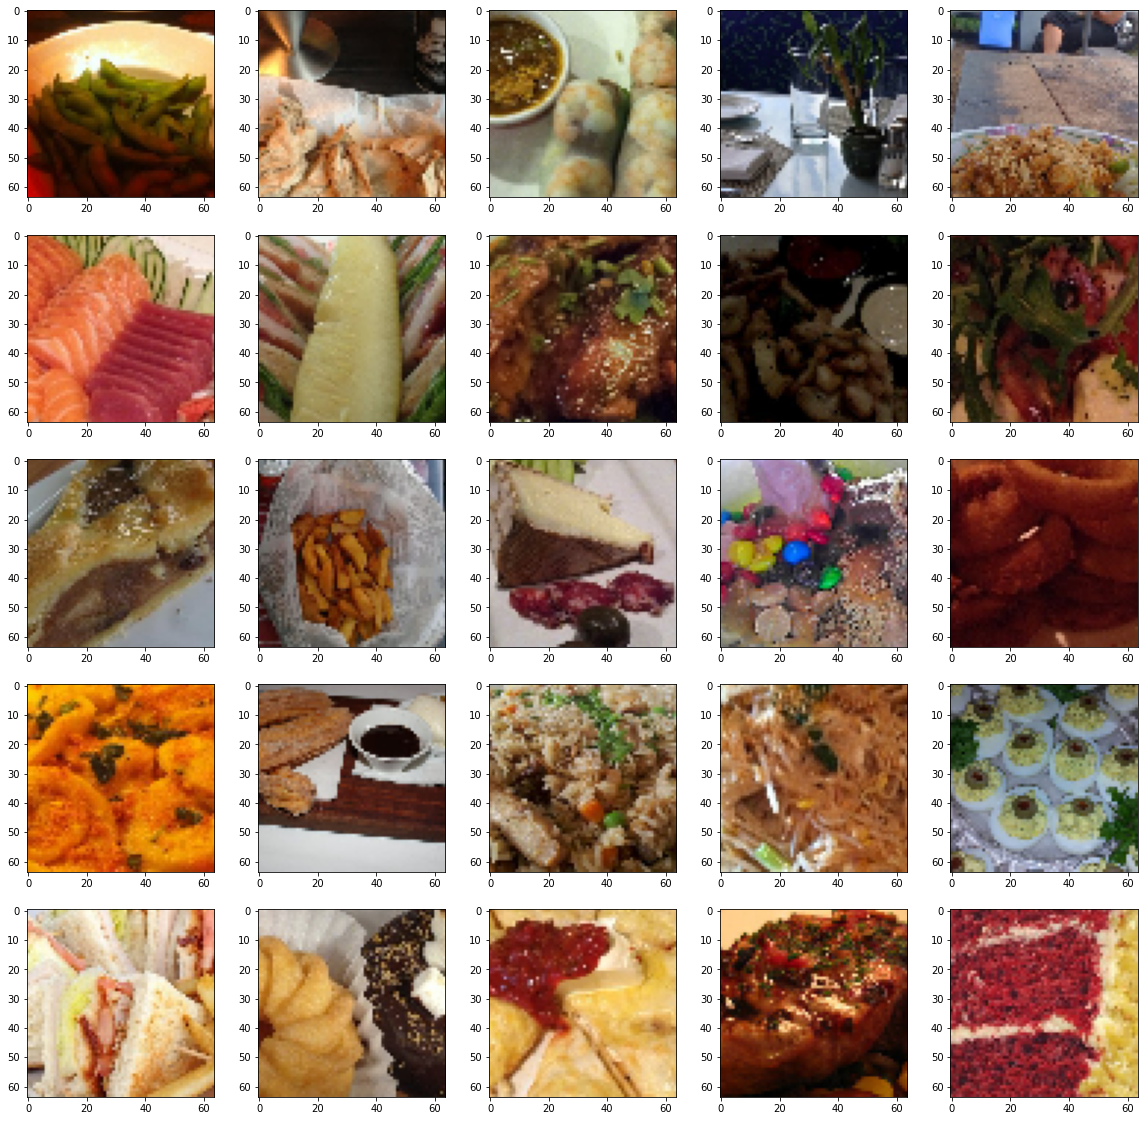

In [7]:
# Print Sample Pictures
print([int(i) for i in f["category"][0]])
print(f["images"][0].shape)
fig=plt.figure(figsize=(20,20))
n=25
col=5
for i in range(n):
    ax=fig.add_subplot(n/col,col,i+1)
    #ax.set_title(f["category_names"][i].decode())
    ax.imshow(f["images"][i])
plt.savefig("./sample_show_64x64")

In [8]:
X = f['images'][1:100]

In [9]:
y = f['category'][1:100]

In [10]:
X.shape

(99, 64, 64, 3)

In [11]:
y.shape

(99, 101)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
import tensorflow as keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import Sequential
from tensorflow.keras.applications.vgg16 import VGG16

def build_model():

    model = VGG16(include_top=False, weights='imagenet', input_shape=(64, 64, 3))
    model.trainable = False 
    base_model = model
    flattening_layer = layers.Flatten()
    dense_layer = layers.Dense(32, activation='relu')
    prediction_layer = layers.Dense(101, activation='softmax')

    model = Sequential([base_model, flattening_layer, dense_layer, prediction_layer])
    model.compile(optimizer = Adam(learning_rate=0.0001), 
                  metrics = 'accuracy', 
                  loss='categorical_crossentropy')
    return model

model = build_model()



In [15]:
from tensorflow.keras.applications.vgg16 import preprocess_input

preprocess_input(X_train)

array([[[[ 1.0206100e+02,  1.0522100e+02,  9.7320000e+01],
         [ 9.1060997e+01,  9.8221001e+01,  9.2320000e+01],
         [ 6.9060997e+01,  7.7221001e+01,  7.2320000e+01],
         ...,
         [ 1.1060997e+01,  4.2221001e+01,  7.6320000e+01],
         [ 8.0609970e+00,  4.3221001e+01,  7.2320000e+01],
         [ 1.0060997e+01,  4.3221001e+01,  7.7320000e+01]],

        [[ 9.6060997e+01,  9.9221001e+01,  9.1320000e+01],
         [ 9.7060997e+01,  1.0422100e+02,  9.8320000e+01],
         [ 8.2060997e+01,  9.0221001e+01,  8.5320000e+01],
         ...,
         [ 1.1060997e+01,  4.8221001e+01,  8.3320000e+01],
         [-2.0939003e+01,  1.6221001e+01,  5.1320000e+01],
         [-5.9390030e+00,  2.7221001e+01,  6.7320000e+01]],

        [[ 8.7060997e+01,  9.0221001e+01,  8.2320000e+01],
         [ 1.0306100e+02,  1.1022100e+02,  1.0432000e+02],
         [ 1.0106100e+02,  1.0922100e+02,  1.0432000e+02],
         ...,
         [ 1.0060997e+01,  5.3221001e+01,  9.3320000e+01],
         [

In [16]:
X_train.shape

(69, 64, 64, 3)

In [17]:
y_train.shape

(69, 101)

In [18]:
y_train

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [19]:
y_train = y_train.astype(int)

In [20]:
y_train.shape

(69, 101)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(restore_best_weights=True)

model = build_model()


history = model.fit(X_train, 
          y_train, 
          epochs=500, 
          validation_split=0.2, verbose=0, batch_size=16)